In [51]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm

from sklearn import set_config
from geopy.distance import geodesic
from sklearn.metrics import r2_score, mean_absolute_error,  root_mean_squared_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline,make_pipeline


In [4]:
import pandas as pd
import zipfile


with zipfile.ZipFile("/content/Food Delivery Time Prediction Case Study.xlsx.zip", "r") as zip_ref:
    excel_file_name = zip_ref.namelist()[0]
    with zip_ref.open(excel_file_name) as extracted_file:
        df = pd.read_excel(extracted_file)

print(df.head())

     ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken(min)  
0     

In [5]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30
...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26


In [6]:

df.shape

(45593, 11)

In [7]:
df.isna().sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,0
Delivery_person_Ratings,0
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Type_of_order,0
Type_of_vehicle,0


In [8]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.544075,4.632367,17.017729,70.231332,17.465186,70.845702,26.294607
std,5.696793,0.327708,8.185109,22.883647,7.335122,21.118812,9.383806
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,19.000000
50%,29.000000,4.700000,18.546947,75.898497,18.633934,76.002574,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000


In [9]:
df['Type_of_order'].value_counts()

,count
Type_of_order,
Snack,11533
Meal,11458
Drinks,11322
Buffet,11280


In [10]:
df["Type_of_vehicle"].value_counts()

,count
Type_of_vehicle,
motorcycle,26435
scooter,15276
electric_scooter,3814
bicycle,68


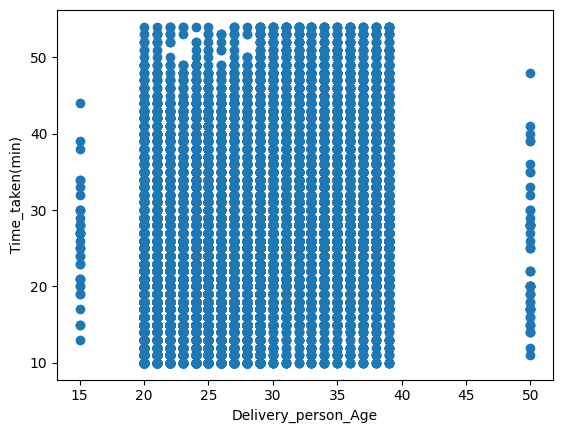

In [11]:
x=df["Delivery_person_Age"]
y=df["Time_taken(min)"]

plt.scatter(x,y)
plt.xlabel("Delivery_person_Age")
plt.ylabel("Time_taken(min)")
plt.show()

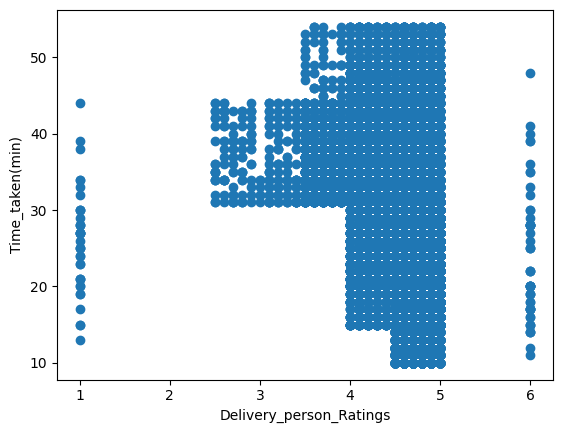

In [12]:
x=df["Delivery_person_Ratings"]
y=df["Time_taken(min)"]

plt.scatter(x,y)
plt.xlabel("Delivery_person_Ratings")
plt.ylabel("Time_taken(min)")
plt.show()

In [13]:
df.shape

(45593, 11)

In [14]:
# distance

for i in range(0, 45593):
  restaurant = (df.at[i, "Restaurant_latitude"],df.at[i, "Restaurant_longitude"])
  delivary= (df.at[i, "Delivery_location_latitude"],df.at[i, "Delivery_location_longitude"])
  distance = geodesic(restaurant, delivary).m
  df.at[0+i, "distance"] = distance

In [15]:
# speed
df["sped"] = df['distance'] /df['Time_taken(min)']

In [16]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),distance,sped
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3020.736643,125.864027
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20143.736910,610.416270
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1549.692932,59.603574
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7774.496620,370.214125
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6197.897917,206.596597
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32,1488.111648,46.503489
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36,10983.241696,305.090047
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16,4648.024233,290.501515
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26,6219.667685,239.217988


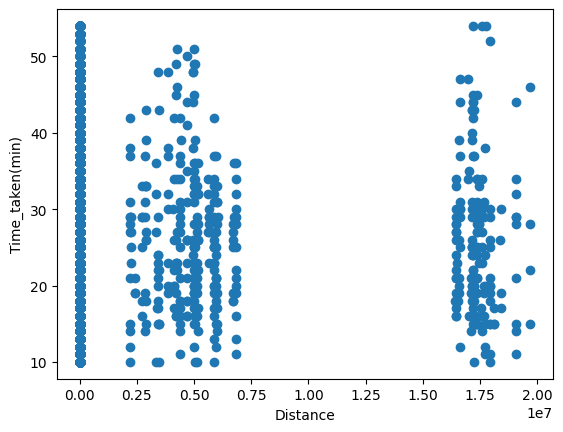

In [17]:
x=df["distance"]
y=df["Time_taken(min)"]

plt.scatter(x,y)
plt.xlabel("Distance")
plt.ylabel("Time_taken(min)")
plt.show()

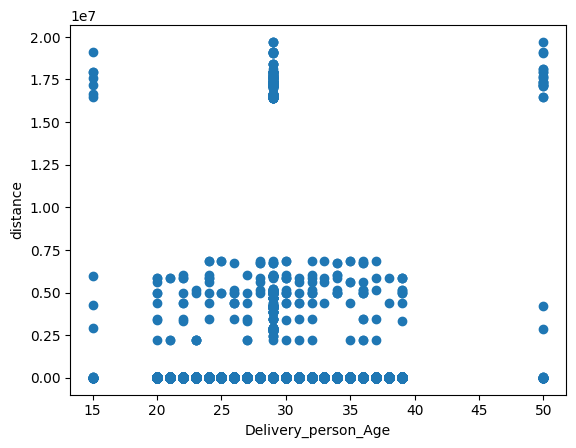

In [18]:
x=df["Delivery_person_Age"]
y=df["distance"]

plt.scatter(x,y)
plt.xlabel("Delivery_person_Age")
plt.ylabel("distance")
plt.show()

<Axes: xlabel='Time_taken(min)', ylabel='Density'>

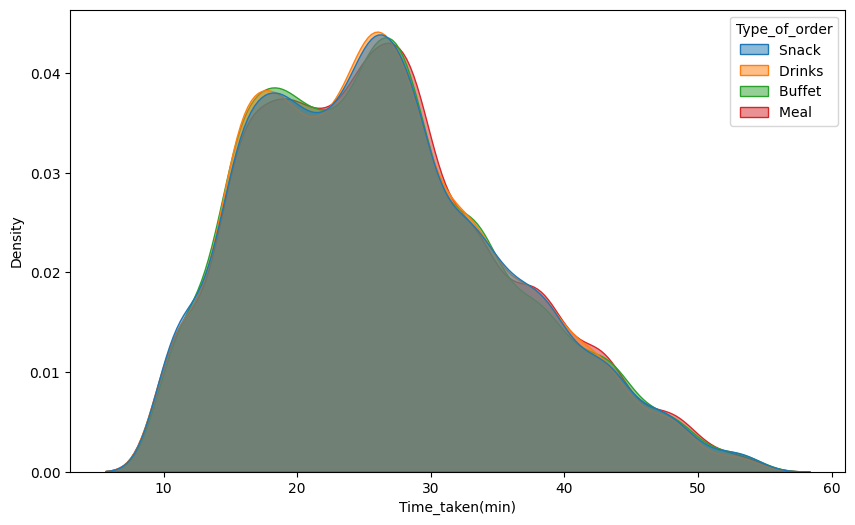

In [19]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df,
            x="Time_taken(min)",
            hue="Type_of_order",
            fill=True,
            common_norm=False,
            alpha = 0.5)


<Axes: xlabel='Time_taken(min)', ylabel='Density'>

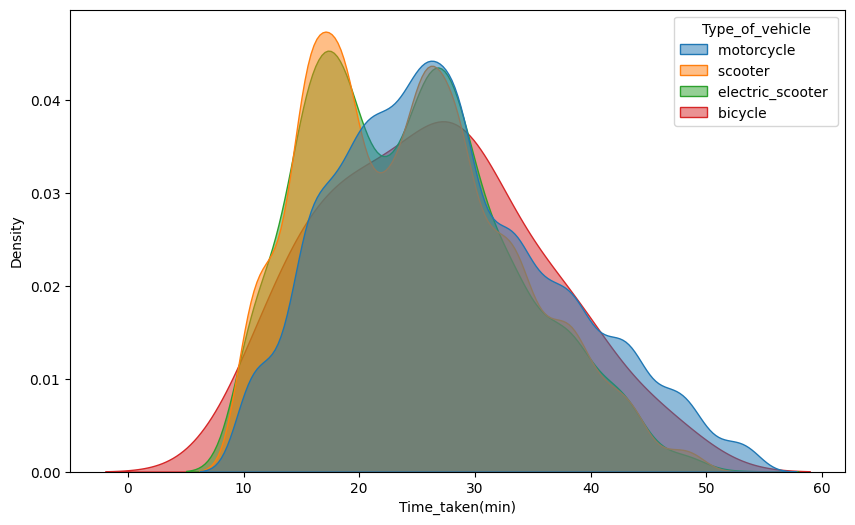

In [20]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df,
            x="Time_taken(min)",
            hue="Type_of_vehicle",
            fill=True,
            common_norm=False,
            alpha = 0.5)


In [21]:
# Type_of_vehicle
# motorcycle = 1
# sooter =1
# eletric_scooter = 1
# bicycle = 2

df["Type_of_vehicle"].value_counts()

,count
Type_of_vehicle,
motorcycle,26435
scooter,15276
electric_scooter,3814
bicycle,68


In [22]:

df.loc[df["Type_of_vehicle"]=="motorcycle ", ["Type_of_vehicle"]]=1
df.loc[df["Type_of_vehicle"]=="scooter ", ["Type_of_vehicle"]]=1
df.loc[df["Type_of_vehicle"]=="electric_scooter ", ["Type_of_vehicle"]]=1
df.loc[df["Type_of_vehicle"]=="bicycle ", ["Type_of_vehicle"]]=2

In [23]:
print(df["Type_of_vehicle"].value_counts())
df["Type_of_vehicle"] = df["Type_of_vehicle"].astype(int)
df.info()

Type_of_vehicle
1    45525
2       68
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  int64  
 10  Time_taken(min)              45593 non-null  int64  
 11  distance                     45593 non-null  float64
 12  sped      

In [24]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),distance,sped
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,1,24,3020.736643,125.864027
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,1,33,20143.736910,610.416270
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,1,26,1549.692932,59.603574
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,1,21,7774.496620,370.214125
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,1,30,6197.897917,206.596597
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,1,32,1488.111648,46.503489
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,1,36,10983.241696,305.090047
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,1,16,4648.024233,290.501515
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,1,26,6219.667685,239.217988


In [25]:
df = df.drop(["ID", "Delivery_person_ID"], axis=1)

In [26]:
x = df.drop(["Time_taken(min)"], axis=1)
y= df.iloc[:,-3]

In [27]:
x,y

(       Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
 0                       37                      4.9            22.745049   
 1                       34                      4.5            12.913041   
 2                       23                      4.4            12.914264   
 3                       38                      4.7            11.003669   
 4                       32                      4.6            12.972793   
 ...                    ...                      ...                  ...   
 45588                   30                      4.8            26.902328   
 45589                   21                      4.6             0.000000   
 45590                   30                      4.9            13.022394   
 45591                   20                      4.7            11.001753   
 45592                   23                      4.9            23.351058   
 
        Restaurant_longitude  Delivery_location_latitude  \
 0            

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


In [29]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

       Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
29044                   37                      4.8            22.308096   
41736                   28                      4.2            12.337978   
17874                   24                      4.6            22.761593   
42093                   34                      4.0            22.310329   
22952                   28                      4.8             0.000000   
...                    ...                      ...                  ...   
11284                   37                      4.9            10.961850   
44732                   34                      4.9            26.891191   
38158                   39                      4.9            18.927584   
860                     25                      4.9            13.086438   
15795                   31                      4.6            17.410371   

       Restaurant_longitude  Delivery_location_latitude  \
29044             73.167753 

In [30]:
df.sample()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),distance,sped
38066,25,4.6,12.3085,76.665808,12.3485,76.705808,Meal,1,29,6205.619093,213.986865


In [31]:
a1 = ColumnTransformer([
    ("ohe_Type_of_order",OneHotEncoder(sparse_output=False, handle_unknown="ignore"),[-5])
], remainder="passthrough")

In [32]:
a1

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe_Type_of_order',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 [-5])])

In [33]:
a2=ColumnTransformer([
    ("scale", MinMaxScaler(), slice(0,-4))
])

In [34]:
a2


ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, -4, None))])

In [35]:
a3= DecisionTreeRegressor()

In [36]:
pipe=Pipeline([
    ("a1", a1),
    ('a2', a2),
    ('a3', a3)
])

In [37]:
pipe=make_pipeline(a1,a2,a3)

In [38]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_Type_of_order',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [-5])])),
                ('columntransformer-2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, -4, None))])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [39]:
pipe.named_steps

{'columntransformer-1': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_Type_of_order',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  [-5])]),
 'columntransformer-2': ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, -4, None))]),
 'decisiontreeregressor': DecisionTreeRegressor()}

In [52]:
set_config(display='duagram')

In [53]:
y_pred= pipe.predict(x_train)

In [54]:
y_pred

array([28., 16., 28., ..., 33., 29., 30.])

In [55]:
r2_score(y_train, y_pred)

0.9515299937441081

In [56]:
mean_absolute_error(y_train, y_pred)

0.5546548286390366

In [57]:
root_mean_squared_error(y_train, y_pred)

2.06700603043105

In [58]:
mean_absolute_percentage_error(y_train, y_pred)

0.024877323423717044